# Imports

In [ ]:
import pandas as pd
import numpy as np
import requests as rq
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Fetch

### URLS

In [ ]:
auber_url = 'https://data.ratp.fr/api/v2/catalog/datasets/qualite-de-lair-mesuree-dans-la-station-auber/exports/json?limit=-1&offset=0&lang=en&timezone=UTC'
chatelet_url = 'https://data.ratp.fr/api/v2/catalog/datasets/qualite-de-lair-mesuree-dans-la-station-chatelet/exports/json?limit=-1&offset=0&lang=en&timezone=UTC'
franklin_url = 'https://data.ratp.fr/api/v2/catalog/datasets/qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt/exports/json?limit=-1&offset=0&lang=en&timezone=UTC'

JSON to Dataframes

In [ ]:
auber_data = rq.get(auber_url).json()
chatelet_data = rq.get(chatelet_url).json()
franklin_data = rq.get(franklin_url).json()


In [ ]:
auber_df = pd.DataFrame(auber_data)
chatelet_df = pd.DataFrame(chatelet_data)
franklin_df = pd.DataFrame(franklin_data)

In [ ]:
franklin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85437 entries, 0 to 85436
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dateheure  85437 non-null  object
 1   nofra1     80258 non-null  object
 2   n2fra1     80798 non-null  object
 3   10fra1     82514 non-null  object
 4   c2fra1     80652 non-null  object
 5   tfra1      83535 non-null  object
 6   hyfra1     83528 non-null  object
dtypes: object(7)
memory usage: 4.6+ MB


In [ ]:
auber_df[auber_df.isna().any(axis=1)]

,dateheure,noauba,n2auba,10auba,25auba,c2auba,tauba,hyauba
0,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
8731,None,None,None,None,None,None,None,None
8732,None,None,None,None,None,None,None,None
8733,None,None,None,None,None,None,None,None
8734,None,None,None,None,None,None,None,None


In [ ]:
auber_df.head()

,dateheure,noauba,n2auba,10auba,25auba,c2auba,tauba,hyauba
0,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None


In [ ]:
franklin_df.head()

,dateheure,nofra1,n2fra1,10fra1,c2fra1,tfra1,hyfra1
0,2014-01-01T05:00:00+00:00,13,48,19,464,"13,3","58,2"
1,2014-01-01T09:00:00+00:00,9,36,17,418,"12,8","62,6"
2,2014-01-01T15:00:00+00:00,17,44,20,515,"13,6","62,9"
3,2014-01-01T16:00:00+00:00,25,51,20,531,"13,9","62,4"
4,2014-01-01T18:00:00+00:00,58,64,31,611,"14,1","65,2"


# EDA

In [ ]:
chatelet_df.head()

,dateheure,nocha4,n2cha4,10cha4,c2cha4,tcha4,hycha4
0,2013-01-01T06:00:00+00:00,3,26,146,563,"20,9",46
1,2013-01-01T09:00:00+00:00,7,31,128,517,"20,9","45,2"
2,2013-01-01T14:00:00+00:00,16,41,164,653,21,"36,6"
3,2013-01-01T19:00:00+00:00,41,62,180,689,21,38
4,2013-01-02T04:00:00+00:00,2,28,6,461,"18,7","37,4"


In [ ]:
chatelet_df.tail()

,dateheure,nocha4,n2cha4,10cha4,c2cha4,tcha4,hycha4
85432,2022-10-09T06:00:00+00:00,ND,ND,5,437,"17,2","42,9"
85433,2022-10-09T13:00:00+00:00,ND,ND,29,564,18,"44,7"
85434,2022-10-09T15:00:00+00:00,ND,ND,43,578,"18,5","43,7"
85435,2022-10-09T18:00:00+00:00,ND,ND,65,637,"19,5","43,5"
85436,2022-10-10T00:00:00+00:00,ND,ND,43,508,"18,2","49,1"


In [ ]:
chatelet_df.describe()

,dateheure,nocha4,n2cha4,10cha4,c2cha4,tcha4,hycha4
count,85437,64108,72046,72820,73133,74852,74863
unique,85434,352,142,783,745,226,752
top,2019-10-27T02:00:00+00:00,ND,ND,ND,ND,"20,3","42,1"
freq,2,6967,6113,2713,3418,882,412


In [ ]:
#columns with missing values
na_cols = chatelet_df.columns[chatelet_df.isna().any()].tolist()

#Missing values summary
mv = pd.DataFrame(chatelet_df[na_cols].isna().sum() , columns = ['Number_missing'])
mv['Percentage_missing'] = np.round(100*mv['Number_missing']/len(chatelet_df),2)
mv

,Number_missing,Percentage_missing
nocha4,21329,24.96
n2cha4,13391,15.67
10cha4,12617,14.77
c2cha4,12304,14.40
tcha4,10585,12.39
hycha4,10574,12.38


In [ ]:
#columns with missing values
na_cols = auber_df.columns[auber_df.isna().any()].tolist()

#Missing values summary
mv = pd.DataFrame(auber_df[na_cols].isna().sum() , columns = ['Number_missing'])
mv['Percentage_missing'] = np.round(100*mv['Number_missing']/len(auber_df),2)
mv

,Number_missing,Percentage_missing
dateheure,8736,10.33
noauba,8736,10.33
n2auba,8736,10.33
10auba,8736,10.33
25auba,8736,10.33
c2auba,8736,10.33
tauba,8736,10.33
hyauba,8736,10.33


In [ ]:
#columns with missing values
na_cols = franklin_df.columns[franklin_df.isna().any()].tolist()

#Missing values summary
mv = pd.DataFrame(franklin_df[na_cols].isna().sum() , columns = ['Number_missing'])
mv['Percentage_missing'] = np.round(100*mv['Number_missing']/len(franklin_df),2)
mv

,Number_missing,Percentage_missing
nofra1,5179,6.06
n2fra1,4639,5.43
10fra1,2923,3.42
c2fra1,4785,5.60
tfra1,1902,2.23
hyfra1,1909,2.23


[Text(0.5, 1.0, 'Missing Values Chatelet')]

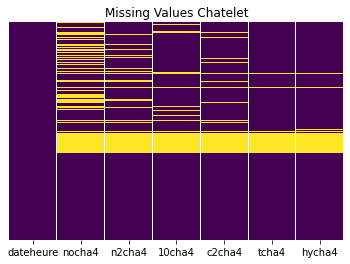

In [ ]:
sns.heatmap(chatelet_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Chatelet")

[Text(0.5, 1.0, 'Missing Values Auber')]

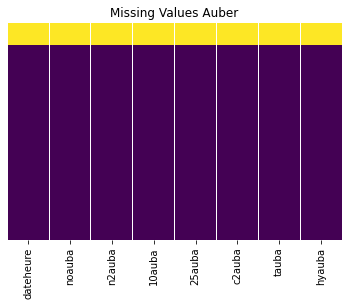

In [ ]:
sns.heatmap(auber_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Auber")

[Text(0.5, 1.0, 'Missing Values Franklin')]

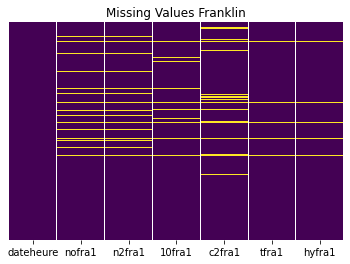

In [ ]:
sns.heatmap(franklin_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Franklin")

In [ ]:
chatelet_df = chatelet_df.replace(',', '.', regex= True)
auber_df = auber_df.replace(',', '.', regex= True)
franklin_df = franklin_df.replace(',', '.', regex= True)

In [ ]:
chatelet_df = chatelet_df.replace('ND', np.nan, regex= True)
auber_df = auber_df.replace('ND', np.nan, regex= True)
franklin_df = franklin_df.replace('ND', np.nan, regex= True)

In [ ]:
chatelet_df = chatelet_df.rename(columns = {'dateheure':'Date_Heure','nocha4':'NO','n2cha4':'NO2','10cha4':'PM10','c2cha4':'CO2','tcha4':'TEMP','hycha4':'HUMI'})
auber_df = auber_df.rename(columns = {'dateheure':'Date_Heure','noauba':'NO','n2auba':'NO2','10auba':'PM10','25auba':'PM25','c2auba':'CO2','tauba':'TEMP','hyauba':'HUMI'})
franklin_df = franklin_df.rename(columns = {'dateheure':'Date_Heure','nofra1':'NO','n2fra1':'NO2','10fra1':'PM10','c2fra1':'CO2','tfra1':'TEMP','hyfra1':'HUMI'})

In [ ]:
auber_df

,Date_Heure,NO,NO2,PM10,PM25,CO2,TEMP,HUMI
0,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
84539,2022-10-09T04:00:00+00:00,29,48,16,9,461,20.4,38.7
84540,2022-10-09T12:00:00+00:00,21,37,86,30,525,20.8,39.6
84541,2022-10-09T13:00:00+00:00,7,39,104,36,543,21.2,40.5
84542,2022-10-09T19:00:00+00:00,<2,45,131,44,603,22.6,40.8


In [ ]:
auber_df.dropna(thresh=6, inplace=True)
franklin_df.dropna(thresh=5, inplace=True)
chatelet_df.dropna(thresh=5, inplace=True)

[Text(0.5, 1.0, 'Missing Values Auber')]

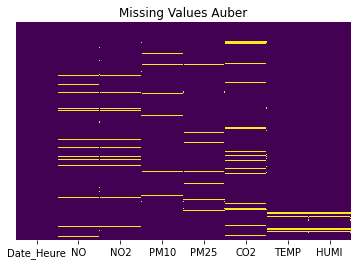

In [ ]:
sns.heatmap(auber_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Auber")

[Text(0.5, 1.0, 'Missing Values Chatelet')]

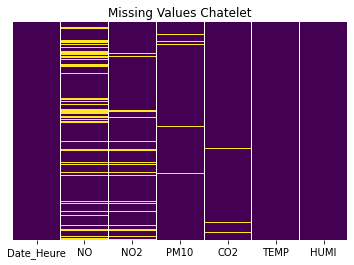

In [ ]:
sns.heatmap(chatelet_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Chatelet")

[Text(0.5, 1.0, 'Missing Values Franklin')]

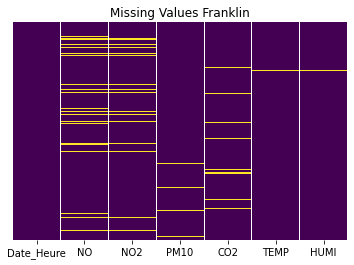

In [ ]:
sns.heatmap(franklin_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Franklin")

In [ ]:
auber_df['Date_Heure'] = pd.to_datetime(auber_df['Date_Heure'], errors='coerce')
chatelet_df['Date_Heure'] = pd.to_datetime(chatelet_df['Date_Heure'], errors='coerce')
franklin_df['Date_Heure'] = pd.to_datetime(franklin_df['Date_Heure'], errors='coerce')
auber_df['Date_Heure'] = auber_df['Date_Heure'].dt.strftime('%Y-%m-%d %H:%M:%S')
chatelet_df['Date_Heure'] = chatelet_df['Date_Heure'].dt.strftime('%Y-%m-%d %H:%M:%S')
franklin_df['Date_Heure'] = franklin_df['Date_Heure'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
auber_df

,Date_Heure,NO,NO2,PM10,PM25,CO2,TEMP,HUMI
8736,2016-01-01 01:00:00,17,48,88,46,493,19.6,42.6
8737,2016-01-01 13:00:00,16,44,69,28,461,18.6,44.7
8738,2016-01-01 15:00:00,20,45,80,48,483,18.9,45.3
8739,2016-01-02 00:00:00,11,36,68,26,442,18.6,43.9
8740,2016-01-02 11:00:00,12,44,82,32,493,18.8,47.2
...,...,...,...,...,...,...,...,...
84539,2022-10-09 04:00:00,29,48,16,9,461,20.4,38.7
84540,2022-10-09 12:00:00,21,37,86,30,525,20.8,39.6
84541,2022-10-09 13:00:00,7,39,104,36,543,21.2,40.5
84542,2022-10-09 19:00:00,<2,45,131,44,603,22.6,40.8


In [ ]:
chatelet_df = chatelet_df.replace(to_replace=[r'<',r'>'], value='', regex=True)
auber_df = auber_df.replace(to_replace=[r'<',r'>'], value='', regex=True)
franklin_df = franklin_df.replace(to_replace=[r'<',r'>'], value='', regex=True)

In [ ]:
chatelet_df[["NO",	"NO2",	"PM10",	"CO2",	"TEMP",	"HUMI"]] = chatelet_df[["NO",	"NO2",	"PM10",	"CO2",	"TEMP",	"HUMI"]].apply(pd.to_numeric)
auber_df[["NO",	"NO2",	"PM10","PM25"	,"CO2",	"TEMP",	"HUMI"]] = auber_df[["NO",	"NO2",	"PM10","PM25"	,"CO2",	"TEMP",	"HUMI"]].apply(pd.to_numeric)
franklin_df[["NO",	"NO2",	"PM10",	"CO2",	"TEMP",	"HUMI"]] = franklin_df[["NO",	"NO2",	"PM10",	"CO2",	"TEMP",	"HUMI"]].apply(pd.to_numeric)

In [ ]:
chatelet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72359 entries, 0 to 85436
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date_Heure  72359 non-null  object 
 1   NO          57123 non-null  float64
 2   NO2         65856 non-null  float64
 3   PM10        69487 non-null  float64
 4   CO2         69469 non-null  float64
 5   TEMP        72178 non-null  float64
 6   HUMI        72167 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.4+ MB


In [ ]:
auber_df['Date_Heure'] = pd.to_datetime(auber_df['Date_Heure'], errors='coerce')
chatelet_df['Date_Heure'] = pd.to_datetime(chatelet_df['Date_Heure'], errors='coerce')
franklin_df['Date_Heure'] = pd.to_datetime(franklin_df['Date_Heure'], errors='coerce')

In [ ]:
chatelet_df.groupby([chatelet_df['Date_Heure'].dt.date,chatelet_df['Date_Heure'].dt.hour]).NO.mean()

Date_Heure  Date_Heure
2013-01-01  1             6.0
            2             6.0
            3             4.0
            4             3.0
            5             4.0
                         ... 
2022-10-09  20            NaN
            21            NaN
            22            NaN
            23            NaN
2022-10-10  0             NaN
Name: NO, Length: 72358, dtype: float64

In [ ]:
# chatelet_df["NO"] = chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour]).transform(lambda x: x.fillna(x.mean()))
chatelet_df['NO'] = chatelet_df['NO'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['NO'].transform('mean'))
chatelet_df['NO2'] = chatelet_df['NO2'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['NO2'].transform('mean'))
chatelet_df['PM10'] = chatelet_df['PM10'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['PM10'].transform('mean'))
chatelet_df['CO2'] = chatelet_df['CO2'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['CO2'].transform('mean'))
chatelet_df['TEMP'] = chatelet_df['TEMP'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['TEMP'].transform('mean'))
chatelet_df['HUMI'] = chatelet_df['HUMI'].fillna(chatelet_df.groupby([chatelet_df['Date_Heure'].dt.hour])['HUMI'].transform('mean'))

[Text(0.5, 1.0, 'Missing Values Chatelet')]

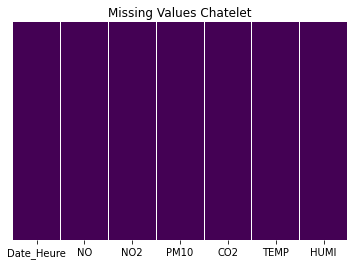

In [ ]:
sns.heatmap(chatelet_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Chatelet")

In [ ]:
auber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49219 entries, 8736 to 84543
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date_Heure  49219 non-null  datetime64[ns]
 1   NO          46323 non-null  float64       
 2   NO2         46622 non-null  float64       
 3   PM10        48519 non-null  float64       
 4   PM25        47682 non-null  float64       
 5   CO2         46352 non-null  float64       
 6   TEMP        47474 non-null  float64       
 7   HUMI        47475 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.4 MB


In [ ]:
# auber_df["NO"] = auber_df.groupby([auber_df['Date_Heure'].dt.hour]).transform(lambda x: x.fillna(x.mean()))
auber_df['NO'] = auber_df['NO'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['NO'].transform('mean'))
auber_df['NO2'] = auber_df['NO2'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['NO2'].transform('mean'))
auber_df['PM10'] = auber_df['PM10'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['PM10'].transform('mean'))
auber_df['PM25'] = auber_df['PM25'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['PM25'].transform('mean'))
auber_df['CO2'] = auber_df['CO2'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['CO2'].transform('mean'))
auber_df['TEMP'] = auber_df['TEMP'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['TEMP'].transform('mean'))
auber_df['HUMI'] = auber_df['HUMI'].fillna(auber_df.groupby([auber_df['Date_Heure'].dt.hour])['HUMI'].transform('mean'))

[Text(0.5, 1.0, 'Missing Values Auber')]

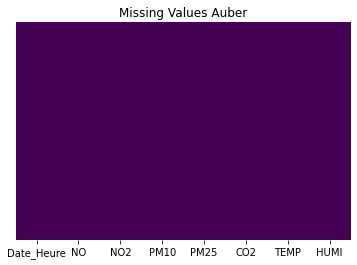

In [ ]:
sns.heatmap(auber_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Auber")

In [ ]:
franklin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81726 entries, 0 to 85436
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date_Heure  81726 non-null  datetime64[ns]
 1   NO          75989 non-null  float64       
 2   NO2         77392 non-null  float64       
 3   PM10        79294 non-null  float64       
 4   CO2         77163 non-null  float64       
 5   TEMP        81300 non-null  float64       
 6   HUMI        81289 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 5.0 MB


In [ ]:
# franklin_df["NO"] = franklin_df.groupby([franklin_df['Date_Heure'].dt.hour]).transform(lambda x: x.fillna(x.mean()))
franklin_df['NO'] = franklin_df['NO'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['NO'].transform('mean'))
franklin_df['NO2'] = franklin_df['NO2'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['NO2'].transform('mean'))
franklin_df['PM10'] = franklin_df['PM10'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['PM10'].transform('mean'))
franklin_df['CO2'] = franklin_df['CO2'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['CO2'].transform('mean'))
franklin_df['TEMP'] = franklin_df['TEMP'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['TEMP'].transform('mean'))
franklin_df['HUMI'] = franklin_df['HUMI'].fillna(franklin_df.groupby([franklin_df['Date_Heure'].dt.hour])['HUMI'].transform('mean'))

[Text(0.5, 1.0, 'Missing Values Franklin')]

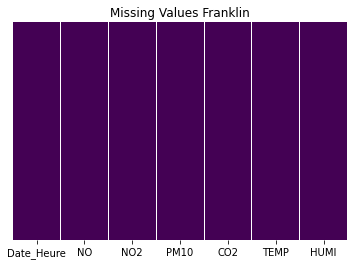

In [ ]:
sns.heatmap(franklin_df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title="Missing Values Franklin")

In [ ]:
franklin_df['hour'] = franklin_df['Date_Heure'].apply(lambda x: x.hour)
franklin_df['weekday'] = franklin_df['Date_Heure'].apply(lambda x: x.weekday())
franklin_df['month'] = franklin_df['Date_Heure'].apply(lambda x: x.month)
franklin_df['year'] = franklin_df['Date_Heure'].apply(lambda x: x.year)
auber_df['hour'] = auber_df['Date_Heure'].apply(lambda x: x.hour)
auber_df['weekday'] = auber_df['Date_Heure'].apply(lambda x: x.weekday())
auber_df['month'] = auber_df['Date_Heure'].apply(lambda x: x.month)
auber_df['year'] = auber_df['Date_Heure'].apply(lambda x: x.year)
chatelet_df['hour'] = chatelet_df['Date_Heure'].apply(lambda x: x.hour)
chatelet_df['weekday'] = chatelet_df['Date_Heure'].apply(lambda x: x.weekday())
chatelet_df['month'] = chatelet_df['Date_Heure'].apply(lambda x: x.month)
chatelet_df['year'] = chatelet_df['Date_Heure'].apply(lambda x: x.year)
chatelet_df

,Date_Heure,NO,NO2,PM10,CO2,TEMP,HUMI,hour,weekday,month,year
0,2013-01-01 06:00:00,3.000000,26.000000,146.0,563.0,20.9,46.0,6,1,1,2013
1,2013-01-01 09:00:00,7.000000,31.000000,128.0,517.0,20.9,45.2,9,1,1,2013
2,2013-01-01 14:00:00,16.000000,41.000000,164.0,653.0,21.0,36.6,14,1,1,2013
3,2013-01-01 19:00:00,41.000000,62.000000,180.0,689.0,21.0,38.0,19,1,1,2013
4,2013-01-02 04:00:00,2.000000,28.000000,6.0,461.0,18.7,37.4,4,2,1,2013
...,...,...,...,...,...,...,...,...,...,...,...
85432,2022-10-09 06:00:00,19.347024,28.921234,5.0,437.0,17.2,42.9,6,6,10,2022
85433,2022-10-09 13:00:00,22.614840,35.675082,29.0,564.0,18.0,44.7,13,6,10,2022
85434,2022-10-09 15:00:00,20.103809,34.873580,43.0,578.0,18.5,43.7,15,6,10,2022
85435,2022-10-09 18:00:00,20.257613,35.894376,65.0,637.0,19.5,43.5,18,6,10,2022


(0.0, 2500.0)

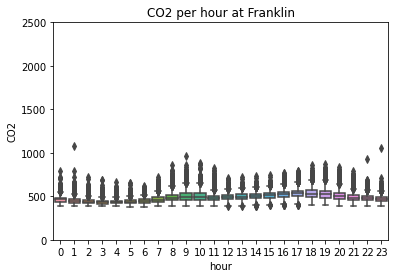

In [ ]:
sns.boxplot(data=franklin_df,x='hour',y='CO2').set_title('CO2 per hour at Franklin')
plt.ylim(0, 2500)

(0.0, 2500.0)

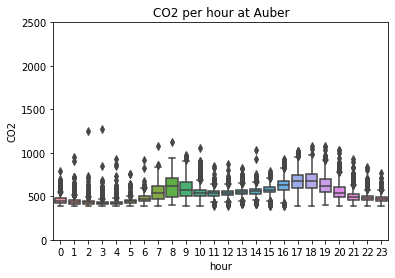

In [ ]:
sns.boxplot(data=auber_df,x='hour',y='CO2').set_title('CO2 per hour at Auber')
plt.ylim(0, 2500)

(0.0, 2500.0)

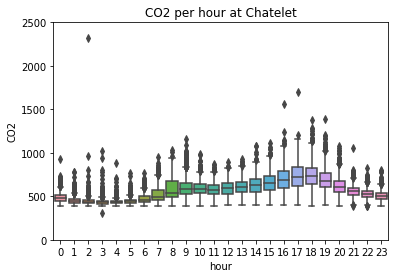

In [ ]:
sns.boxplot(data=chatelet_df,x='hour',y='CO2').set_title('CO2 per hour at Chatelet')
plt.ylim(0, 2500)

(0.0, 2500.0)

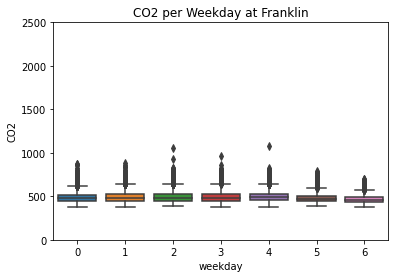

In [ ]:
sns.boxplot(data=franklin_df,x='weekday',y='CO2').set_title('CO2 per Weekday at Franklin')
plt.ylim(0, 2500)

(0.0, 2500.0)

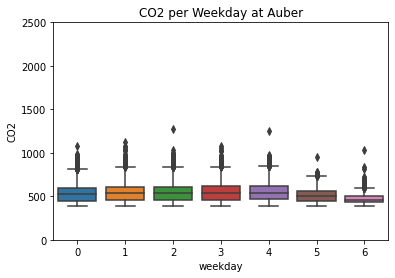

In [ ]:
sns.boxplot(data=auber_df,x='weekday',y='CO2').set_title('CO2 per Weekday at Auber')
plt.ylim(0, 2500)

(0.0, 2500.0)

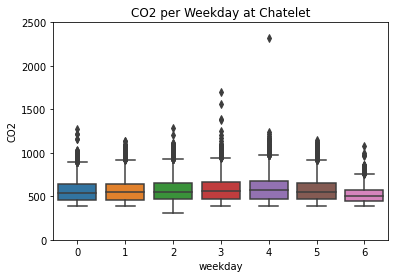

In [ ]:
sns.boxplot(data=chatelet_df,x='weekday',y='CO2').set_title('CO2 per Weekday at Chatelet')
plt.ylim(0, 2500)

(0.0, 2000.0)

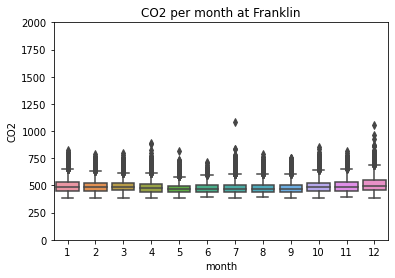

In [ ]:
sns.boxplot(data=franklin_df,x='month',y='CO2').set_title('CO2 per month at Franklin')
plt.ylim(0, 2000)

(0.0, 2000.0)

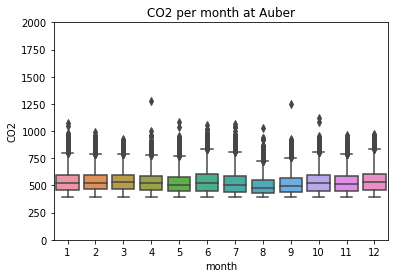

In [ ]:
sns.boxplot(data=auber_df,x='month',y='CO2').set_title('CO2 per month at Auber')
plt.ylim(0, 2000)

(0.0, 2000.0)

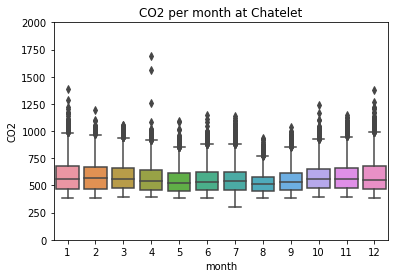

In [ ]:
sns.boxplot(data=chatelet_df,x='month',y='CO2').set_title('CO2 per month at Chatelet')
plt.ylim(0, 2000)

# Machine Learning

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

In [ ]:
import datetime as dt
X = chatelet_df.drop(['CO2', 'NO', 'NO2','PM10'], axis=1)
y = chatelet_df['CO2']


X['Date_Heure']=X['Date_Heure'].map(dt.datetime.toordinal)

In [ ]:
df_to_use = chatelet_df

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=0.3)

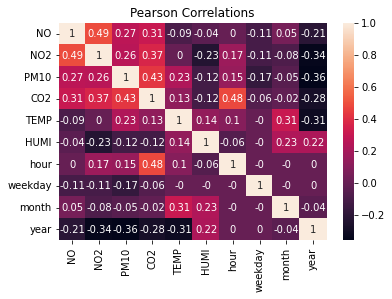

In [ ]:
#displays the correlation values
sns.heatmap(round(df_to_use.corr(),2),annot=True).set(title='Pearson Correlations');

## Regression Methods

## Linear Regression

In [ ]:
# With text trian split

lm = LinearRegression()
model = lm.fit(X_train,y_train)
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')
feature_names = X.columns
model_coefficients = lm.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)
y_pred = model.predict(X_eval)

results = pd.DataFrame({'Actual': y_eval, 'Predicted': y_pred})




alpha = 24283.600840205727
betas = [ 1.20086103e-01 -4.33665881e-02 -2.29087129e-01  8.86465522e+00
 -3.53853261e+00 -4.76052155e+00 -5.56308580e+01]
            Coefficient value
Date_Heure           0.120086
TEMP                -0.043367
HUMI                -0.229087
hour                 8.864655
weekday             -3.538533
month               -4.760522
year               -55.630858


In [ ]:
# Evaluation of the model
mae = mean_absolute_error(y_eval, y_pred)
mse = mean_squared_error(y_eval, y_pred)
rmse = np.sqrt(mse)


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

print('R2: ',lm.score(X_eval, y_eval))
actual_minus_predicted = sum((y_eval - y_pred)**2)
actual_minus_actual_mean = sum((y_eval - y_eval.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)
lm.score(X_eval, y_eval)

#lm.score(X_train, y_train)

Mean absolute error: 80.03
Mean squared error: 11169.29
Root mean squared error: 105.68
R2:  0.3135438959893395
R²: 0.3135438959893454


0.3135438959893395

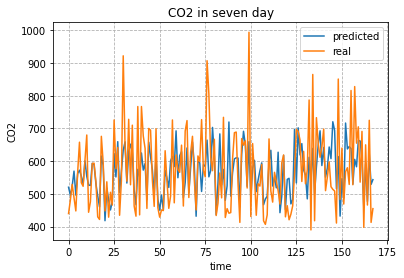

In [ ]:

plt.plot(y_pred[0:24*7], label="predicted")
plt.plot(y_eval[0:24*7].reset_index(drop=True), label="real")
plt.title('CO2 in seven day')
plt.xlabel('time')
plt.ylabel('CO2')
plt.legend(loc="upper right")
plt.grid(linestyle = '--')
plt.show()

## Decision Trees

Mean Absolute Error: 32.588125127320545
Mean Squared Error: 2759.256967305255
Root Mean Squared Error: 52.52862997742521
R2:  0.8304182061464807


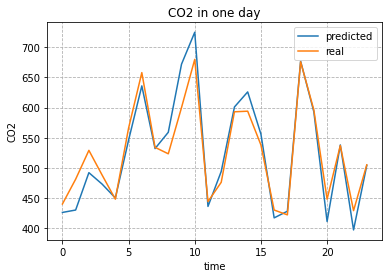

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_eval)
df=pd.DataFrame({'Actual':y_eval, 'Predicted':y_pred})

print('Mean Absolute Error:', metrics.mean_absolute_error(y_eval, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_eval, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_eval, y_pred)))
print('R2: ',regressor.score(X_eval, y_eval))
#actual_minus_predicted = sum((y_eval - y_pred)**2)
#actual_minus_actual_mean = sum((y_eval - y_eval.mean())**2)
#r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
#print('R²:', r2)

plt.plot(y_pred[0:24], label="predicted")
plt.plot(y_eval[0:24].reset_index(drop=True), label="real")
plt.title('CO2 in one day')
plt.xlabel('time')
plt.ylabel('CO2')
plt.legend(loc="upper right")
plt.grid(linestyle = '--')
plt.show()

## Ridge

In [ ]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_eval)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_eval, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_eval, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_eval, y_pred)))

actual_minus_predicted = sum((y_eval - y_pred)**2)
actual_minus_actual_mean = sum((y_eval - y_eval.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)
ridge.score(X_eval, y_eval)


model_coefficients = ridge.coef_

#coefficients_df = pd.DataFrame(data = model_coefficients, 
#                              index = feature_names, 
#                              columns = ['Coefficient value'])
#print(coefficients_df)

Mean Absolute Error: 80.02768962478497
Mean Squared Error: 11169.225784889035
Root Mean Squared Error: 105.6845579301396
R²: 0.3135480431870513


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import math
import math
reg = Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_eval)

print("The Explained Variance: %.2f" % reg.score(X_eval, y_eval))
print("The Mean Absolute Error: %.2f " % mean_absolute_error(y_eval, y_pred))
print("The Median Absolute Error: %.2f " % median_absolute_error(y_eval, y_pred))

mse = mean_squared_error(y_eval, y_pred)
r2 = r2_score(y_eval, y_pred)
intercept = reg.intercept_

print("Mean squared error: %.2f" %mse)
print("Root mean squared error: %.2f" %math.sqrt(mse))
print("R2 Score: %.2f" %r2)
#print("Intercept: %.6f" %intercept)


#print('Linear coefficients:', reg.coef_)


The Explained Variance: 0.31
The Mean Absolute Error: 80.03 
The Median Absolute Error: 63.48 
Mean squared error: 11169.23
Root mean squared error: 105.68
R2 Score: 0.31


## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
lasso.score(X_eval, y_eval), lasso.score(X_train, y_train)

(0.31368811422006193, 0.32152772926348994)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.5)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_eval)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_eval, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_eval, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_eval, y_pred)))

actual_minus_predicted = sum((y_eval - y_pred)**2)
actual_minus_actual_mean = sum((y_eval - y_eval.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)
#lasso.score(X_eval, y_eval)


#model_coefficients = lasso.coef_

#coefficients_df = pd.DataFrame(data = model_coefficients, 
#                              index = feature_names, 
#                              columns = ['Coefficient value'])
#print(coefficients_df)

Mean Absolute Error: 80.02895265797393
Mean Squared Error: 11166.85617656868
Root Mean Squared Error: 105.67334657598708
R²: 0.31369367747717036


## Elac Net

In [ ]:
from sklearn.linear_model import ElasticNet
ENet = ElasticNet(alpha=.5)
ENet.fit(X_train, y_train)
y_pred = ENet.predict(X_eval)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_eval, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_eval, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_eval, y_pred)))

actual_minus_predicted = sum((y_eval - y_pred)**2)
actual_minus_actual_mean = sum((y_eval - y_eval.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)
ENet.score(X_eval, y_eval)


#model_coefficients = ENet.coef_

#coefficients_df = pd.DataFrame(data = model_coefficients, 
#                              index = feature_names, 
#                              columns = ['Coefficient value'])
#print(coefficients_df)

Mean Absolute Error: 80.06103806341615
Mean Squared Error: 11167.119969984882
Root Mean Squared Error: 105.67459472354214
R²: 0.3136774649383446


0.31367746493833826

# Time Series Models

In [ ]:
chatelet_time_data = chatelet_df[['Date_Heure','CO2']]
chatelet_time_data.set_index('Date_Heure', inplace=True)
train_data = chatelet_time_data['CO2'][:len(chatelet_time_data)-16000]
test_data = chatelet_time_data['CO2'][len(chatelet_time_data)-16000:]

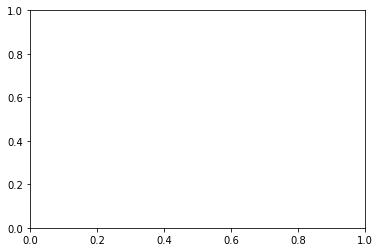

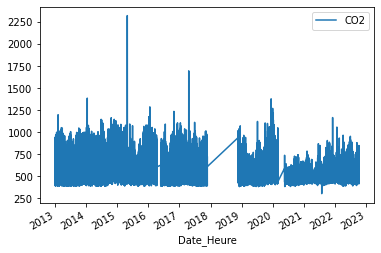

In [ ]:
fig, ax = plt.subplots()
ax = chatelet_time_data.plot()

### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [ ]:
from scipy.stats import norm
import statsmodels.api as sm
from tqdm import tqdm

In [ ]:
data_chatelet = chatelet_df
data_chatelet.index = data_chatelet.Date_Heure
data_chatelet = data_chatelet.drop(['Date_Heure','NO','NO2','PM10'], axis=1)
data_chatelet.head()

,CO2,TEMP,HUMI,hour,weekday,month,year
Date_Heure,,,,,,,
2013-01-01 06:00:00,563.0,20.9,46.0,6,1,1,2013
2013-01-01 09:00:00,517.0,20.9,45.2,9,1,1,2013
2013-01-01 14:00:00,653.0,21.0,36.6,14,1,1,2013
2013-01-01 19:00:00,689.0,21.0,38.0,19,1,1,2013
2013-01-02 04:00:00,461.0,18.7,37.4,4,2,1,2013


In [ ]:
train = data_chatelet.iloc[:int(0.9*len(data_chatelet))]
test = data_chatelet.iloc[int(0.9*len(data_chatelet)):]

In [ ]:
# Variables
exog_data = train.drop(['CO2'],axis=1)
exog = sm.add_constant(exog_data)
endog = train[[u'CO2']]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,0,1))
fit_res = mod.fit(disp=False)
print(fit_res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                65123
Model:               SARIMAX(1, 0, 1)   Log Likelihood             -393509.683
Date:                Wed, 02 Nov 2022   AIC                         787039.365
Time:                        20:01:19   BIC                         787130.206
Sample:                             0   HQIC                        787067.475
                              - 65123                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.965e+04   1206.256     24.583      0.000    2.73e+04     3.2e+04
TEMP           9.5956      0.229     41.987      0.000       9.148      10.044
HUMI           0.1395      0.055      2.558      0.0

In [ ]:
first_predict = test.iloc[0].name
# print(last_train,first_predict)
# import datetime as dt

# start_dt = dt.datetime.strptime(last_train, '%Y-%m-%d %H:%M:%S')
# predict_dt = dt.datetime.strptime(first_predict, '%Y-%m-%d %H:%M:%S')
# diff = (predict_dt - start_dt) 
# days, seconds = diff.days, diff.seconds
# hours = days * 24 + seconds // 3600
# print(hours)

exog1 = (sm.add_constant(test).loc[first_predict:])
exog1 = exog1.drop(['CO2'],axis=1)

# print(pd.concat([exog,exog1]))
# predict = fit_res.predict(start=hours,end=hours,exog=exog1)
# print(predict)

forecast = fit_res.forecast(steps = len(test),exog = exog1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
result_data = pd.DataFrame(index=test.index, columns=['Date_Heure','CO2'])
result_data.head()

,Date_Heure,CO2
Date_Heure,,
2021-07-30 03:00:00,NaN,NaN
2021-07-30 14:00:00,NaN,NaN
2021-07-30 17:00:00,NaN,NaN
2021-07-30 20:00:00,NaN,NaN
2021-07-30 21:00:00,NaN,NaN


In [ ]:
chk = 0
for i in tqdm(forecast):
    result_data.iloc[chk]["Date_Heure"] = test.iloc[chk].name
    result_data.iloc[chk]["CO2"] = i
    chk+=1
result_data.head()

100%|██████████| 7236/7236 [00:02<00:00, 2961.65it/s]


,Date_Heure,CO2
Date_Heure,,
2021-07-30 03:00:00,2021-07-30 03:00:00,418.354873
2021-07-30 14:00:00,2021-07-30 14:00:00,520.376048
2021-07-30 17:00:00,2021-07-30 17:00:00,548.261187
2021-07-30 20:00:00,2021-07-30 20:00:00,573.535834
2021-07-30 21:00:00,2021-07-30 21:00:00,580.999616


In [ ]:
test['CO2'].head()

Date_Heure
2021-07-30 03:00:00    433.0
2021-07-30 14:00:00    535.0
2021-07-30 17:00:00    600.0
2021-07-30 20:00:00    550.0
2021-07-30 21:00:00    533.0
Name: CO2, dtype: float64

In [ ]:
result_data = result_data[~result_data.index.duplicated()]

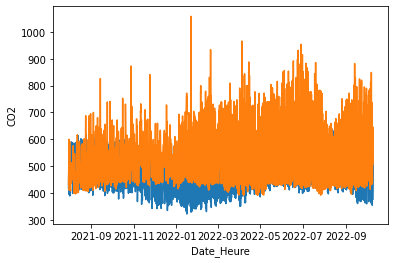

In [ ]:
sns.lineplot(x=result_data['Date_Heure'],y=result_data['CO2'])
test = test[~test.index.duplicated()]
sns.lineplot(x=test.index
             ,y=test['CO2'])